In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

energia2022 = pd.read_csv('daasbstp2023/train/energia_202201-202212.csv', encoding='latin-1')    
energia2021 = pd.read_csv('daasbstp2023/train/energia_202109-202112.csv', encoding='latin-1')

energia2023_test = pd.read_csv('daasbstp2023/test/energia_202301-202304.csv', encoding='latin-1')

meteo2022 = pd.read_csv('daasbstp2023/train/meteo_202201-202212.csv', encoding='latin-1')
meteo2021 = pd.read_csv('daasbstp2023/train/meteo_202109-202112.csv', encoding='latin-1')

meteo2023_test = pd.read_csv('daasbstp2023/test/meteo_202301-202304.csv', encoding='latin-1')


# Converter datas
energia2021['Data'] = pd.to_datetime(energia2021['Data'], format='%Y-%m-%d')
energia2021['Hora'] = pd.to_datetime(energia2021['Hora'], format='%H')

energia2021['dt_converted'] = energia2021['Data'] + pd.to_timedelta(energia2021['Hora'].dt.hour, unit='h')

energia2021['dt_converted'] = pd.to_datetime(energia2021['dt_converted'], unit='s', utc=True)


energia2022['Data'] = pd.to_datetime(energia2022['Data'], format='%Y-%m-%d')
energia2022['Hora'] = pd.to_datetime(energia2022['Hora'], format='%H')

energia2022['dt_converted'] = energia2022['Data'] + pd.to_timedelta(energia2022['Hora'].dt.hour, unit='h')

energia2022['dt_converted'] = pd.to_datetime(energia2022['dt_converted'], unit='s', utc=True)


energia2023_test['Data'] = pd.to_datetime(energia2023_test['Data'], format='%Y-%m-%d')
energia2023_test['Hora'] = pd.to_datetime(energia2023_test['Hora'], format='%H')

energia2023_test['dt_converted'] = energia2023_test['Data'] + pd.to_timedelta(energia2023_test['Hora'].dt.hour, unit='h')

energia2023_test['dt_converted'] = pd.to_datetime(energia2023_test['dt_converted'], unit='s', utc=True)


meteo2021['dt_converted'] = pd.to_datetime(meteo2021['dt'], unit='s', utc=True)
meteo2022['dt_converted'] = pd.to_datetime(meteo2022['dt'], unit='s', utc=True)
meteo2023_test['dt_converted'] = pd.to_datetime(meteo2023_test['dt'], unit='s', utc=True)

# Merge datasets based on datetime
data21 = pd.merge(energia2021, meteo2021, on='dt_converted', how='inner')
data22 = pd.merge(energia2022, meteo2022, on='dt_converted', how='inner')

test = pd.merge(energia2023_test, meteo2023_test, on='dt_converted', how='outer')

# Drop columns
data21.drop('sea_level', axis=1, inplace=True)
data21.drop('grnd_level', axis=1, inplace=True)
data21.drop('rain_1h', axis=1, inplace=True)
data21.drop('Data', axis=1, inplace=True)
data21.drop('Hora', axis=1, inplace=True)
data21.drop('dt_iso', axis=1, inplace=True)
data21.drop('dt', axis=1, inplace=True)

data22.drop('sea_level', axis=1, inplace=True)
data22.drop('grnd_level', axis=1, inplace=True)
data22.drop('rain_1h', axis=1, inplace=True)
data22.drop('Data', axis=1, inplace=True)
data22.drop('Hora', axis=1, inplace=True)
data22.drop('dt_iso', axis=1, inplace=True)
data22.drop('dt', axis=1, inplace=True)

test.drop('sea_level', axis=1, inplace=True)
test.drop('grnd_level', axis=1, inplace=True)
test.drop('rain_1h', axis=1, inplace=True)
test.drop('Data', axis=1, inplace=True)
test.drop('Hora', axis=1, inplace=True)
test.drop('dt_iso', axis=1, inplace=True)
test.drop('dt', axis=1, inplace=True)

data21.drop('city_name', axis=1, inplace=True)
data22.drop('city_name', axis=1, inplace=True)
test.drop('city_name', axis=1, inplace=True)

train = pd.concat([data21, data22], axis=0)


# separar data em ano, mes e dia

train['ano'] = train['dt_converted'].apply(lambda x: x.year)
train['mes'] = train['dt_converted'].apply(lambda x: x.month)
train['dia'] = train['dt_converted'].apply(lambda x: x.day)
train['hora'] = train['dt_converted'].apply(lambda x: x.hour)

train['dia da semana'] = train['dt_converted'].apply(lambda x: x.weekday())

test['ano'] = test['dt_converted'].apply(lambda x: x.year)
test['mes'] = test['dt_converted'].apply(lambda x: x.month)
test['dia'] = test['dt_converted'].apply(lambda x: x.day)
test['hora'] = test['dt_converted'].apply(lambda x: x.hour)

test['dia da semana'] = test['dt_converted'].apply(lambda x: x.weekday())

train.drop('dt_converted', axis=1, inplace=True)
test.drop('dt_converted', axis=1, inplace=True)

lb_make = LabelEncoder()
train["weather_description"] = lb_make.fit_transform(train["weather_description"])
test["weather_description"] = lb_make.fit_transform(test["weather_description"])

train['weather_description'].unique()


train['Injeção na rede (kWh)'] = train['Injeção na rede (kWh)'].fillna('None')

dict_target = {"None": 0, "Low": 1, "Medium": 2, "High": 3, "Very High": 4}
train["Injeção na rede (kWh)"] = train["Injeção na rede (kWh)"].map(dict_target)

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,ano,mes,dia,hora,dia da semana
count,2256.000000,2256.000000,2256.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,2256.000000,2256.0,2256.000000,2256.000000,2256.000000,2256.000000
mean,0.268060,0.226809,0.119439,10.599606,9.543265,9.177917,11.643813,1023.493721,75.639840,2.873613,44.489726,5.620124,2023.0,2.085106,14.978723,11.500000,2.978723
std,0.464323,0.375752,0.190601,3.715156,4.191224,4.021176,3.596882,6.650873,17.415468,1.620450,42.972438,2.392843,0.0,0.907143,8.925982,6.923721,2.026759
min,0.000000,0.000000,0.000000,0.930000,-1.790000,-0.850000,3.340000,1006.000000,23.000000,0.120000,0.000000,0.000000,2023.0,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.877500,6.217500,6.247500,8.900000,1020.000000,62.000000,1.800000,0.000000,4.000000,2023.0,1.000000,7.000000,5.750000,1.000000
50%,0.000000,0.000000,0.000000,10.950000,10.135000,9.710000,11.820000,1024.000000,81.000000,2.490000,35.000000,7.000000,2023.0,2.000000,15.000000,11.500000,3.000000
75%,0.398750,0.336000,0.237250,13.292500,12.742500,12.320000,14.040000,1029.000000,91.000000,3.500000,96.000000,7.000000,2023.0,3.000000,23.000000,17.250000,5.000000
max,3.381000,2.771000,1.161000,20.610000,19.790000,20.010000,22.010000,1036.000000,97.000000,10.320000,100.000000,8.000000,2023.0,4.000000,31.000000,23.000000,6.000000


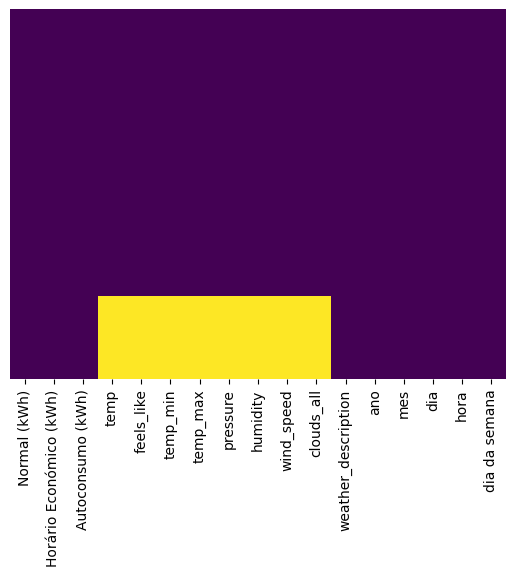

In [468]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')
test.describe()

In [469]:
test["temp"] = test["temp"].interpolate(method='linear', limit_direction='forward', axis=0)
test["temp_min"] = test["temp_min"].interpolate(method='linear', limit_direction='forward', axis=0)
test["temp_max"] = test["temp_max"].interpolate(method='linear', limit_direction='forward', axis=0)
test["pressure"] = test["pressure"].interpolate(method='linear', limit_direction='forward', axis=0)
test["humidity"] = test["humidity"].interpolate(method='linear', limit_direction='forward', axis=0)
test["wind_speed"] = test["wind_speed"].interpolate(method='linear', limit_direction='forward', axis=0)
test["clouds_all"] = test["clouds_all"].interpolate(method='linear', limit_direction='forward', axis=0)

<Axes: >

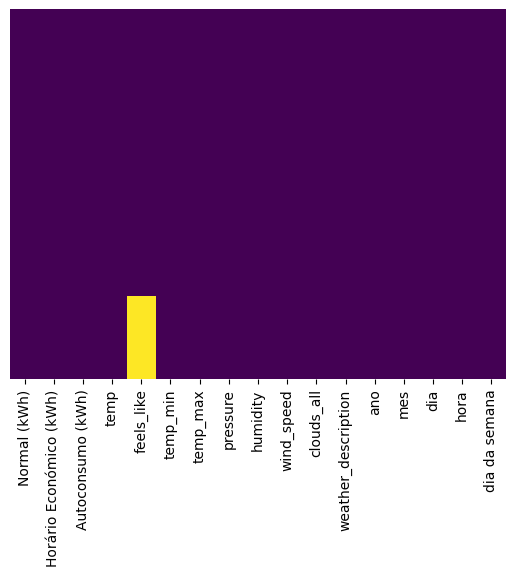

In [470]:
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# # Lista das colunas que você deseja prever independentemente
# columns_to_predict = ['temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'clouds_all']

# #o dataset de treino nao pode ter valores nulos
# test2 = test.dropna(subset=columns_to_predict)

# #dropar colunas que nao serao usadas para prever "columns_to_predict"
# # test3 = test.drop(columns_to_predict, axis=1)
# # Iterar sobre as colunas e treinar modelos separados
# for column in columns_to_predict:
    
#     train_data = test2.dropna(subset=[column])
#     predict_data = test[test[column].isnull()]
    
#     for i in columns_to_predict:
#         if i != column:
#             train_data = train_data.drop(i, axis=1)
#         predict_data = predict_data.drop(i, axis=1)
        
    
#     X_train = train_data.drop(column, axis=1)
#     y_train = train_data[column]

#     # Treinar o modelo (usando regressão linear neste exemplo)
#     model = DecisionTreeRegressor()
#     model.fit(X_train, y_train)

#     # Fazer previsões para os valores ausentes
#     predictions = model.predict(predict_data)

#     # Adicionar as previsões ao DataFrame original
#     test.loc[test[column].isnull(), column] = predictions
    
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [471]:
test.describe()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,ano,mes,dia,hora,dia da semana
count,2256.000000,2256.000000,2256.000000,2256.000000,1752.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.0,2256.000000,2256.000000,2256.000000,2256.000000
mean,0.268060,0.226809,0.119439,10.610864,9.543265,9.048808,11.672004,1023.160018,79.071365,2.497487,35.667553,5.620124,2023.0,2.085106,14.978723,11.500000,2.978723
std,0.464323,0.375752,0.190601,3.273828,4.191224,3.551593,3.169974,5.893633,16.627142,1.590902,41.286521,2.392843,0.0,0.907143,8.925982,6.923721,2.026759
min,0.000000,0.000000,0.000000,0.930000,-1.790000,-0.850000,3.340000,1006.000000,23.000000,0.120000,0.000000,0.000000,2023.0,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,8.895000,6.217500,7.490000,10.010000,1021.000000,68.000000,1.190000,2.000000,4.000000,2023.0,1.000000,7.000000,5.750000,1.000000
50%,0.000000,0.000000,0.000000,10.650000,10.135000,8.600000,11.770000,1022.000000,87.000000,2.100000,5.000000,7.000000,2023.0,2.000000,15.000000,11.500000,3.000000
75%,0.398750,0.336000,0.237250,12.520000,12.742500,11.680000,13.720000,1028.000000,91.000000,3.100000,85.000000,7.000000,2023.0,3.000000,23.000000,17.250000,5.000000
max,3.381000,2.771000,1.161000,20.610000,19.790000,20.010000,22.010000,1036.000000,97.000000,10.320000,100.000000,8.000000,2023.0,4.000000,31.000000,23.000000,6.000000


# 3 - ...

## Outliers

In [472]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             2256 non-null   float64
 1   Horário Económico (kWh)  2256 non-null   float64
 2   Autoconsumo (kWh)        2256 non-null   float64
 3   temp                     2256 non-null   float64
 4   feels_like               1752 non-null   float64
 5   temp_min                 2256 non-null   float64
 6   temp_max                 2256 non-null   float64
 7   pressure                 2256 non-null   float64
 8   humidity                 2256 non-null   float64
 9   wind_speed               2256 non-null   float64
 10  clouds_all               2256 non-null   float64
 11  weather_description      2256 non-null   int32  
 12  ano                      2256 non-null   int64  
 13  mes                      2256 non-null   int64  
 14  dia                     

count    11016.000000
mean         0.202278
std          0.349478
min          0.000000
25%          0.000000
50%          0.000000
75%          0.314000
max          3.251000
Name: Normal (kWh), dtype: float64

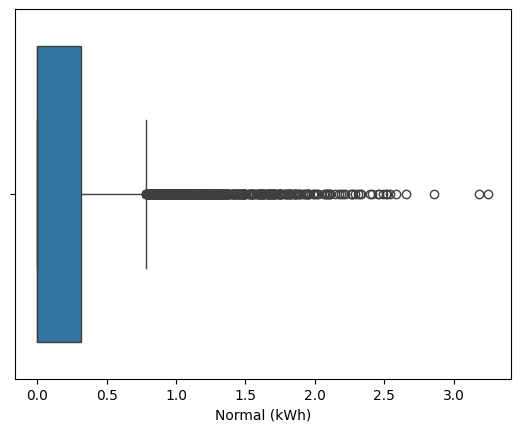

In [473]:
sns.boxplot(x=train["Normal (kWh)"])
train["Normal (kWh)"].describe()

In [474]:
# train.loc[train['Normal (kWh)'] > 3, 'Normal (kWh)'] = 3
# test.loc[train.bmi > 2.5, 'Normal (kWh)'] = np.nan
# test.fillna(2.5, inplace=True)

count    11016.000000
mean         0.202278
std          0.349478
min          0.000000
25%          0.000000
50%          0.000000
75%          0.314000
max          3.251000
Name: Normal (kWh), dtype: float64

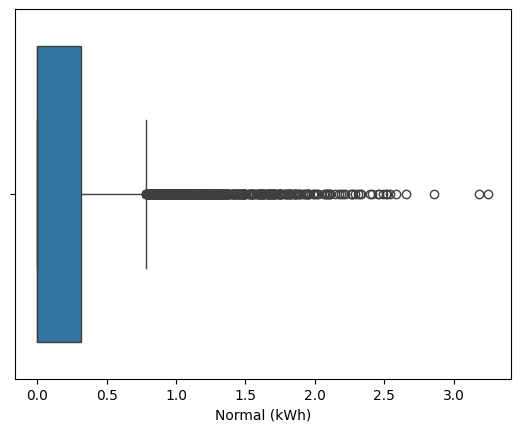

In [475]:
sns.boxplot(x=train["Normal (kWh)"])
train["Normal (kWh)"].describe()

count    11016.000000
mean         0.159714
std          0.271792
min          0.000000
25%          0.000000
50%          0.000000
75%          0.288000
max          6.978000
Name: Horário Económico (kWh), dtype: float64

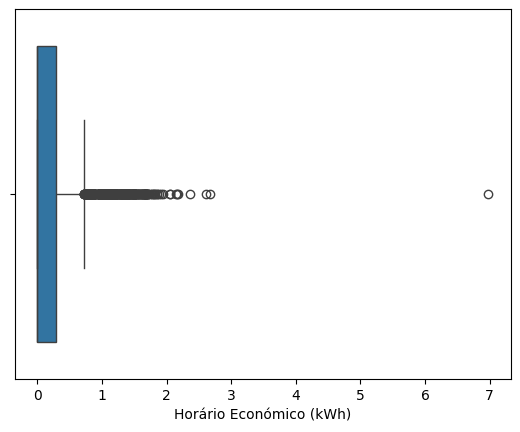

In [476]:
sns.boxplot(x=train["Horário Económico (kWh)"])
train["Horário Económico (kWh)"].describe()

In [477]:
# train.loc[train['Horário Económico (kWh)'] > 4, 'Horário Económico (kWh)'] = 4

count    11016.000000
mean         0.117314
std          0.176762
min          0.000000
25%          0.000000
50%          0.000000
75%          0.227000
max          1.192000
Name: Autoconsumo (kWh), dtype: float64

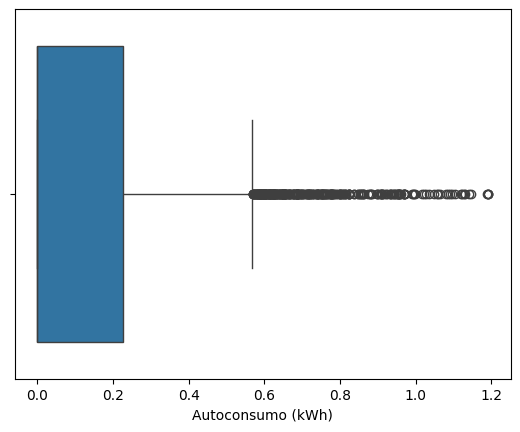

In [478]:
sns.boxplot(x=train["Autoconsumo (kWh)"])
train["Autoconsumo (kWh)"].describe()

In [479]:
# train.loc[train['Autoconsumo (kWh)'] > 1.1, 'Autoconsumo (kWh)'] = 1.1

count    11016.000000
mean        16.182991
std          5.756972
min          0.320000
25%         12.080000
50%         15.625000
75%         19.270000
max         40.850000
Name: temp, dtype: float64

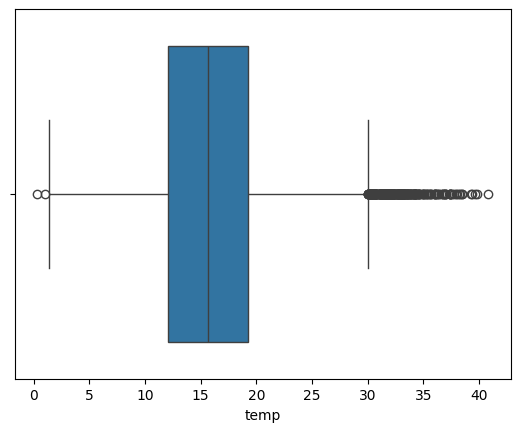

In [480]:
sns.boxplot(x=train["temp"])
train["temp"].describe()

count    11016.000000
mean        15.826868
std          6.264860
min         -2.190000
25%         11.507500
50%         15.230000
75%         19.260000
max         41.330000
Name: feels_like, dtype: float64

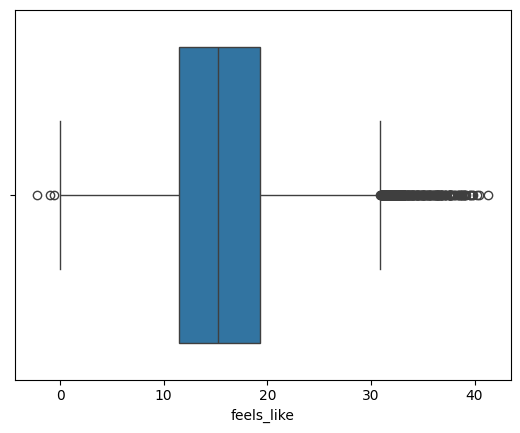

In [481]:
sns.boxplot(x=train["feels_like"])
train["feels_like"].describe()

count    11016.000000
mean        14.195064
std          4.956014
min         -0.640000
25%         10.720000
50%         14.230000
75%         17.490000
max         36.720000
Name: temp_min, dtype: float64

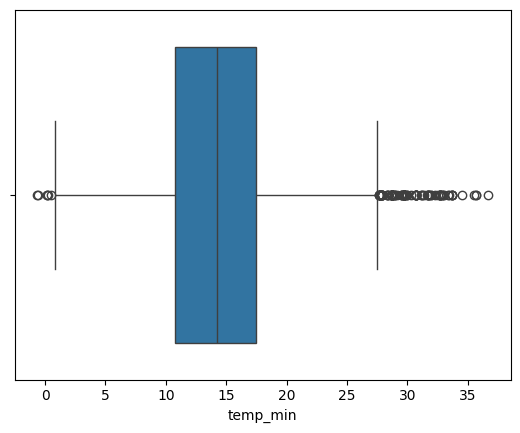

In [482]:
sns.boxplot(x=train["temp_min"])
train["temp_min"].describe()

count    11016.000000
mean        17.288098
std          6.164689
min          1.330000
25%         12.890000
50%         16.260000
75%         20.340000
max         41.450000
Name: temp_max, dtype: float64

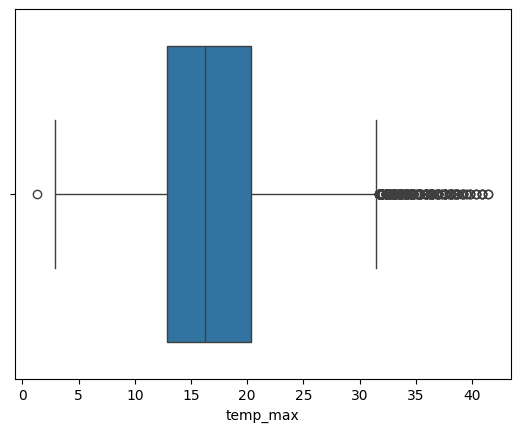

In [483]:
sns.boxplot(x=train["temp_max"])
train["temp_max"].describe()

count    11016.000000
mean      1018.396605
std          6.203379
min        994.000000
25%       1015.000000
50%       1018.000000
75%       1022.000000
max       1034.000000
Name: pressure, dtype: float64

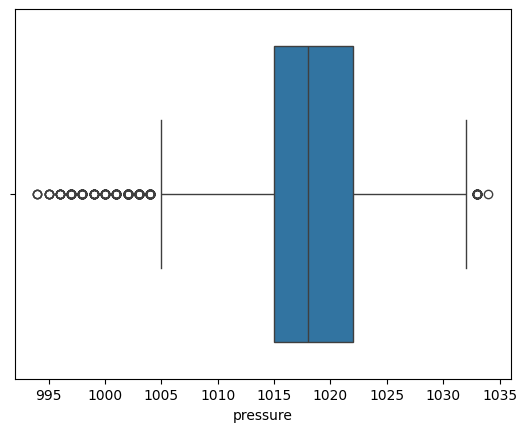

In [484]:
sns.boxplot(x=train["pressure"])
train["pressure"].describe()

count    11016.000000
mean        76.570715
std         16.268260
min         19.000000
25%         66.000000
50%         81.000000
75%         91.000000
max        100.000000
Name: humidity, dtype: float64

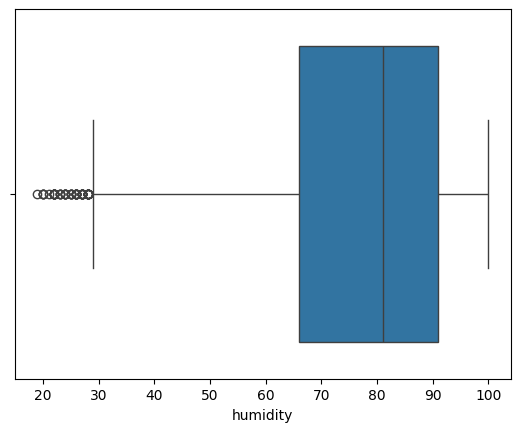

In [485]:
sns.boxplot(x=train["humidity"])
train["humidity"].describe()

count    11016.000000
mean         2.672039
std          1.476158
min          0.060000
25%          1.620000
50%          2.400000
75%          3.420000
max         11.100000
Name: wind_speed, dtype: float64

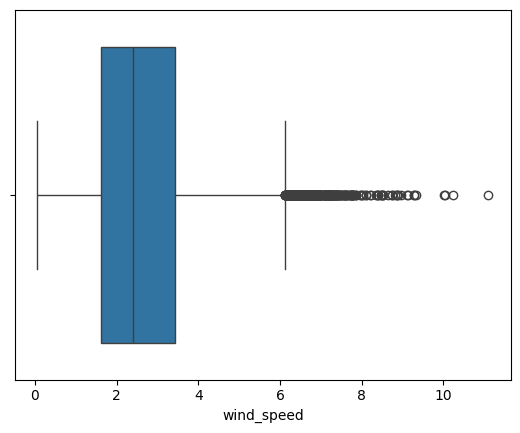

In [486]:
sns.boxplot(x=train["wind_speed"])
train["wind_speed"].describe()

count    11016.000000
mean        54.000908
std         40.553002
min          0.000000
25%          7.000000
50%         60.000000
75%         98.000000
max        100.000000
Name: clouds_all, dtype: float64

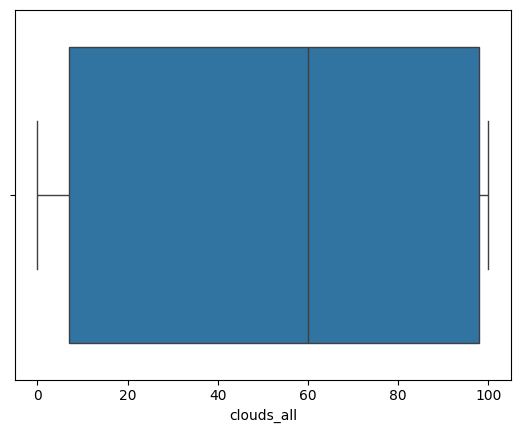

In [487]:
sns.boxplot(x=train["clouds_all"])
train["clouds_all"].describe()

# Drop de colunas 

In [488]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  int64  
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   pressure                 11016 non-null  int64  
 9   humidity                 11016 non-null  int64  
 10  wind_speed               11016 non-null  float64
 11  clouds_all               11016 non-null  int64  
 12  weather_description      11016 non-null  int32  
 13  ano                      11016 non-null  int64  
 14  mes                      110

In [489]:
test.drop('feels_like', axis=1, inplace=True)
train.drop('feels_like', axis=1, inplace=True)

# train.drop('ano', axis=1, inplace=True)
# test.drop('ano', axis=1, inplace=True)

# train.drop('mes', axis=1, inplace=True)
# test.drop('mes', axis=1, inplace=True)

# train.drop('dia', axis=1, inplace=True)
# test.drop('dia', axis=1, inplace=True)

# train.drop('dia da semana', axis=1, inplace=True)
# test.drop('dia da semana', axis=1, inplace=True)

# train.drop('wind_speed', axis=1, inplace=True)
# test.drop('wind_speed', axis=1, inplace=True)

# train.drop('pressure', axis=1, inplace=True)
# test.drop('pressure', axis=1, inplace=True)

# train.drop('weather_description', axis=1, inplace=True)
# test.drop('weather_description', axis=1, inplace=True)




# Correlação

<Axes: >

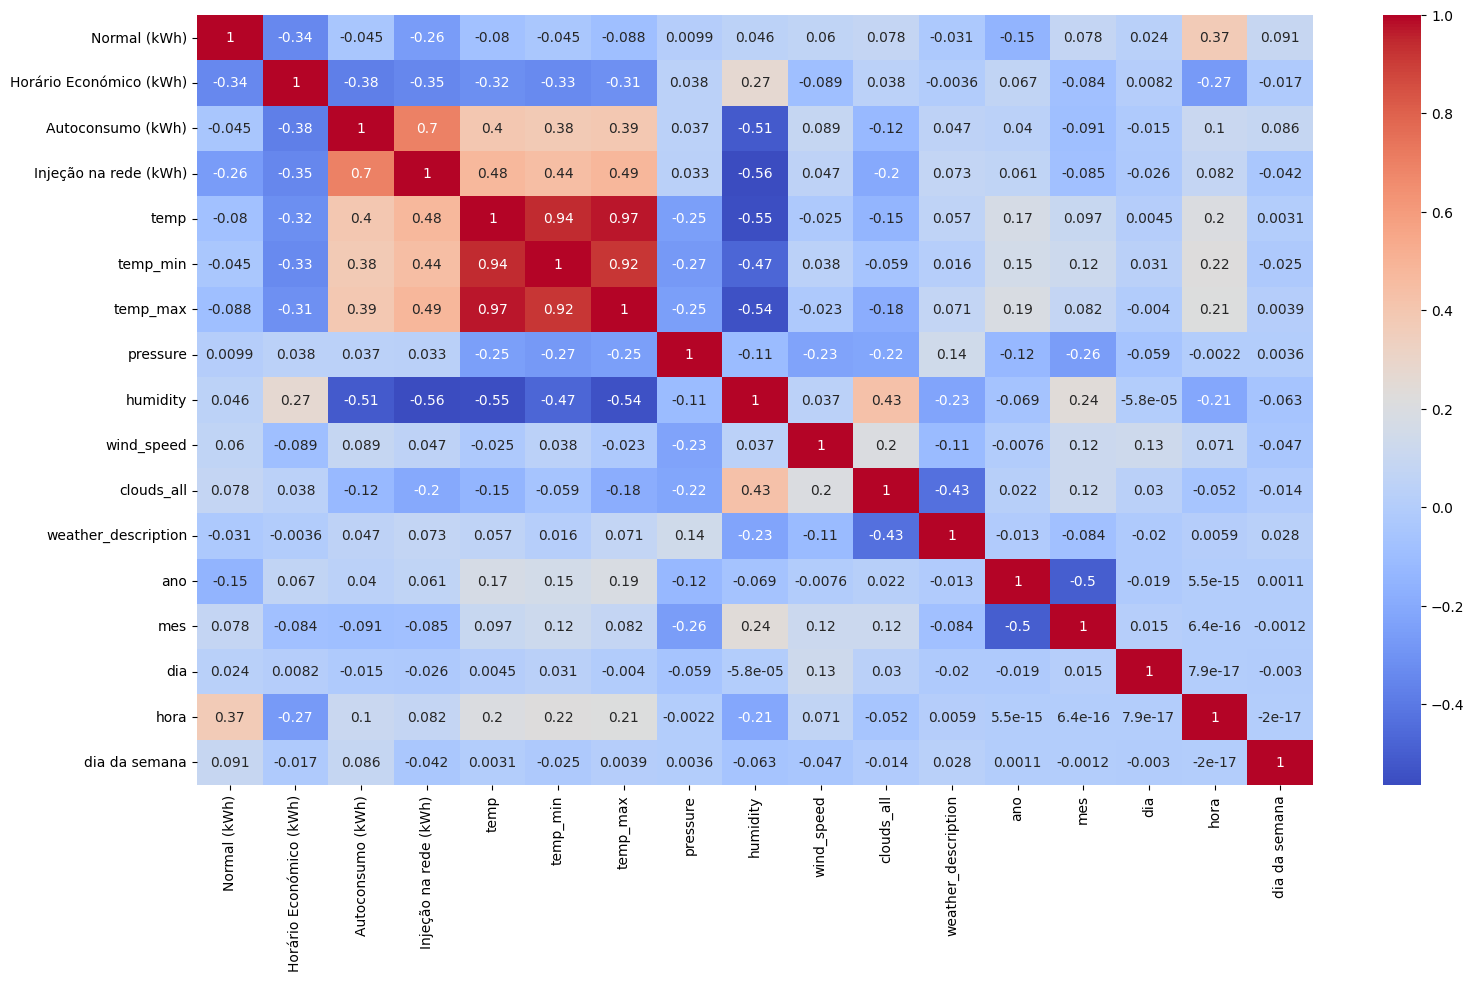

In [490]:
plt.subplots(figsize=(18,10))
train_corr = train.corr(method='pearson')
sns.heatmap(train_corr, annot = True, cmap='coolwarm')

## Normalização

In [491]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             2256 non-null   float64
 1   Horário Económico (kWh)  2256 non-null   float64
 2   Autoconsumo (kWh)        2256 non-null   float64
 3   temp                     2256 non-null   float64
 4   temp_min                 2256 non-null   float64
 5   temp_max                 2256 non-null   float64
 6   pressure                 2256 non-null   float64
 7   humidity                 2256 non-null   float64
 8   wind_speed               2256 non-null   float64
 9   clouds_all               2256 non-null   float64
 10  weather_description      2256 non-null   int32  
 11  ano                      2256 non-null   int64  
 12  mes                      2256 non-null   int64  
 13  dia                      2256 non-null   int64  
 14  hora                    

In [492]:
test.describe()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,ano,mes,dia,hora,dia da semana
count,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.0,2256.000000,2256.000000,2256.000000,2256.000000
mean,0.268060,0.226809,0.119439,10.610864,9.048808,11.672004,1023.160018,79.071365,2.497487,35.667553,5.620124,2023.0,2.085106,14.978723,11.500000,2.978723
std,0.464323,0.375752,0.190601,3.273828,3.551593,3.169974,5.893633,16.627142,1.590902,41.286521,2.392843,0.0,0.907143,8.925982,6.923721,2.026759
min,0.000000,0.000000,0.000000,0.930000,-0.850000,3.340000,1006.000000,23.000000,0.120000,0.000000,0.000000,2023.0,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,8.895000,7.490000,10.010000,1021.000000,68.000000,1.190000,2.000000,4.000000,2023.0,1.000000,7.000000,5.750000,1.000000
50%,0.000000,0.000000,0.000000,10.650000,8.600000,11.770000,1022.000000,87.000000,2.100000,5.000000,7.000000,2023.0,2.000000,15.000000,11.500000,3.000000
75%,0.398750,0.336000,0.237250,12.520000,11.680000,13.720000,1028.000000,91.000000,3.100000,85.000000,7.000000,2023.0,3.000000,23.000000,17.250000,5.000000
max,3.381000,2.771000,1.161000,20.610000,20.010000,22.010000,1036.000000,97.000000,10.320000,100.000000,8.000000,2023.0,4.000000,31.000000,23.000000,6.000000


In [493]:
train.describe()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),temp,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,ano,mes,dia,hora,dia da semana
count,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000
mean,0.202278,0.159714,0.117314,0.758987,16.182991,14.195064,17.288098,1018.396605,76.570715,2.672039,54.000908,4.374818,2021.795207,7.433551,15.803922,11.500000,3.004357
std,0.349478,0.271792,0.176762,1.281918,5.756972,4.956014,6.164689,6.203379,16.268260,1.476158,40.553002,2.403911,0.403569,3.578335,8.835905,6.922501,1.994632
min,0.000000,0.000000,0.000000,0.000000,0.320000,-0.640000,1.330000,994.000000,19.000000,0.060000,0.000000,0.000000,2021.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,12.080000,10.720000,12.890000,1015.000000,66.000000,1.620000,7.000000,3.000000,2022.000000,4.000000,8.000000,5.750000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,15.625000,14.230000,16.260000,1018.000000,81.000000,2.400000,60.000000,5.000000,2022.000000,8.000000,16.000000,11.500000,3.000000
75%,0.314000,0.288000,0.227000,2.000000,19.270000,17.490000,20.340000,1022.000000,91.000000,3.420000,98.000000,7.000000,2022.000000,11.000000,23.000000,17.250000,5.000000
max,3.251000,6.978000,1.192000,4.000000,40.850000,36.720000,41.450000,1034.000000,100.000000,11.100000,100.000000,7.000000,2022.000000,12.000000,31.000000,23.000000,6.000000


In [494]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor#, KerasClassifier

In [495]:
train_feat = train.drop(['Injeção na rede (kWh)'], axis = 1)
train_target = train[['Injeção na rede (kWh)']]

x_train = train_feat
y_train= np.ravel(train_target) 

# Normalização

In [496]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(train_feat)
scaler_Y = MinMaxScaler(feature_range=(0, 1)).fit(train_target)
feat_scaled = pd.DataFrame(scaler_X.transform(train_feat[train_feat.columns]), columns=train_feat.columns)
target_scaled = pd.DataFrame(scaler_Y.transform(train_target[train_target.columns]), columns=train_target.columns)

In [497]:
feat_scaled.describe()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,ano,mes,dia,hora,dia da semana
count,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000
mean,0.062220,0.022888,0.098418,0.391389,0.397084,0.397759,0.609915,0.710750,0.236598,0.540009,0.624974,0.795207,0.584868,0.493464,0.500000,0.500726
std,0.107499,0.038950,0.148290,0.142042,0.132656,0.153656,0.155084,0.200843,0.133710,0.405530,0.343416,0.403569,0.325303,0.294530,0.300978,0.332439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.290155,0.304069,0.288136,0.525000,0.580247,0.141304,0.070000,0.428571,1.000000,0.272727,0.233333,0.250000,0.166667
50%,0.000000,0.000000,0.000000,0.377622,0.398019,0.372134,0.600000,0.765432,0.211957,0.600000,0.714286,1.000000,0.636364,0.500000,0.500000,0.500000
75%,0.096586,0.041273,0.190436,0.467555,0.485278,0.473829,0.700000,0.888889,0.304348,0.980000,1.000000,1.000000,0.909091,0.733333,0.750000,0.833333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [498]:
# sns.heatmap(train_target.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# split train 

In [499]:
# x_train2, x_test2, y_train2, y_test2 = train_test_split(train_feat, train_target, test_size=0.2, random_state=1000)
x_train2, x_test2, y_train2, y_test2 = train_test_split(feat_scaled, train_target, test_size=0.2, random_state=1000)

## SVM

In [500]:
# param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

# grid = GridSearchCV(SVC(random_state=1000),param_grid,refit=True,verbose=3)

In [501]:
# scores = cross_val_score(grid, feat_scaled, train_target, cv=10)

In [502]:
# print("Result for SVM: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [503]:
# grid.fit(x_train2, y_train2)

In [504]:
# predictions = grid.predict(x_test2)

# predictions

In [505]:
# from sklearn.metrics import precision_score
# precision = precision_score(y_test2, predictions, average='micro')

# print(f'Precision: {precision}')

# #Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test2, predictions)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4])
# disp.plot()

## Random Forest

In [506]:
# x_train2.info()

In [507]:
# feat_scaled.info()

In [508]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             2256 non-null   float64
 1   Horário Económico (kWh)  2256 non-null   float64
 2   Autoconsumo (kWh)        2256 non-null   float64
 3   temp                     2256 non-null   float64
 4   temp_min                 2256 non-null   float64
 5   temp_max                 2256 non-null   float64
 6   pressure                 2256 non-null   float64
 7   humidity                 2256 non-null   float64
 8   wind_speed               2256 non-null   float64
 9   clouds_all               2256 non-null   float64
 10  weather_description      2256 non-null   int32  
 11  ano                      2256 non-null   int64  
 12  mes                      2256 non-null   int64  
 13  dia                      2256 non-null   int64  
 14  hora                    

In [509]:
modelRandomForest = RandomForestClassifier(n_estimators = 500)
# scores = cross_val_score(modelRandomForest, x_train, y_train, cv=10)
# print("Result for Random Forest: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [510]:
modelRandomForest.fit(x_train, y_train)
predictions = modelRandomForest.predict(test)

dict_target = {0 : "None", 1: "Low", 2: "Medium", 3: "High", 4:"Very_High"}
sto_numeric = [dict_target[result] for result in predictions]

result_df = pd.DataFrame({'RowId': range(1, len(predictions)+1), 'Result': sto_numeric})
result_df.to_csv("dummy_submission.csv", index=False)

C:\Users\edini22\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Precision: 0.8774954627949183


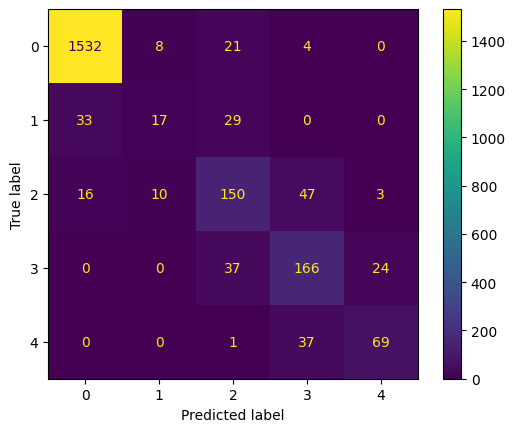

In [511]:
modelRandomForest.fit(x_train2, y_train2)
predictions = modelRandomForest.predict(x_test2)

predictions

from sklearn.metrics import precision_score
precision = precision_score(y_test2, predictions, average='micro')

print(f'Precision: {precision}')

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4])
disp.plot()

In [233]:
# from sklearn.ensemble import AdaBoostClassifier


# adamBoosting = AdaBoostClassifier(n_estimators=500, learning_rate=0.1, random_state=1000)
# scores = cross_val_score(adamBoosting, feat_scaled, np.ravel(train_target), cv=10)
# print("Result for AdaBoost: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))


In [234]:
param_grid = {
    'n_estimators': [400, 500, 600],
    'learning_rate': [0.01, 0.02, 0.1],
    'max_depth': [4, 5, 6]
}

In [235]:
from xgboost import XGBClassifier

# xgboost = XGBClassifier(random_state=1000)
# grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(feat_scaled, np.ravel(train_target))
# print("Result for XGBoost: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [236]:
# Obtenha os melhores parâmetros e a pontuação correspondente
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Accuracy:", best_score)

In [460]:
xgboost = XGBClassifier(n_estimators=500,max_depth=5,learning_rate=0.01 ,random_state=1000)
# scores = cross_val_score(xgboost, x_train, y_train, cv=10)
# print("Result for XGBoost: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [461]:
xgboost.fit(x_train,y_train)
predictions = xgboost.predict(test)

dict_target = {0 : "None", 1: "Low", 2: "Medium", 3: "High", 4:"Very_High"}
sto_numeric = [dict_target[result] for result in predictions]

result_df = pd.DataFrame({'RowId': range(1, len(predictions)+1), 'Result': sto_numeric})
result_df.to_csv("dummy_submission.csv", index=False)

## Redes Neuronais

In [239]:
# x_train2, x_test2, y_train2, y_test2 = train_test_split(feat_scaled, target_scaled, test_size=0.2, random_state=1000)

In [240]:
# #tanh
# def build_model(activation = 'tanh', learning_rate = 0.01):
#     model = Sequential()
#     model.add(Dense(32, input_dim = 9, activation = activation))
#     model.add(Dense(16, activation = activation))
#     model.add(Dense(8, activation = activation))
#     model.add(Dense(1, activation = activation))
    
#     model.compile(loss = 'mae', 
#             optimizer = tf.optimizers.Adam(learning_rate), 
#             metrics = ['mae','mse'])
#     return model

In [241]:
# model = build_model()
# model.summary()

In [242]:
# optimizer = ['SGD', 'RMSprop', 'Adagrad']
# param_grid = dict(optimizer = optimizer)

In [243]:
# kf = KFold(n_splits = 5, shuffle = True, random_state = 2021)

In [244]:
# model = KerasRegressor(model = build_model, batch_size = 32,validation_split = 0.2, epochs = 25)

In [245]:
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='neg_mean_absolute_error', refit='True', verbose=1)

In [246]:
# grid_search.fit(x_train2, y_train2)

In [247]:
# print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

In [248]:
# means = grid_search.cv_results_['mean_test_score']
# stds = grid_search.cv_results_['std_test_score']
# params = grid_search.cv_results_['params']

In [249]:
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [250]:
# best_mlp_model = grid_search.best_estimator_
# print(best_mlp_model)

In [251]:
# print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

In [252]:
# means = grid_search.cv_results_['mean_test_score']
# stds = grid_search.cv_results_['std_test_score']
# params = grid_search.cv_results_['params']

In [253]:
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [254]:
# best_mlp_model_2 = grid_search.best_estimator_
# print(best_mlp_model_2)

In [255]:
# best_mlp_model_2.fit(x_train2,y_train2,epochs = 25, validation_data = (x_train2,y_train2), verbose = 1)

In [256]:
# plt.plot(best_mlp_model_2.history_['loss'])
# plt.plot(best_mlp_model_2.history_['val_loss'])
# plt.title('model performance')
# plt.ylabel('loss values')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.show()

In [257]:
# pd.DataFrame(best_mlp_model_2.history_).plot(figsize=(8, 5))
# plt.grid(True)


### Predictions

In [258]:
# predictions = best_mlp_model_2.predict(x_test2)

In [259]:
# predictions
# #unscale
# predictions = scaler_Y.inverse_transform(predictions)
# predictions[predictions < 0] = 0
# predictions[predictions > 4] = 4
# #round
# predictions = np.round(predictions)
# p = pd.DataFrame(predictions)
# p.to_csv("predictions.csv")
# p.nunique()

# #list of different values
# p2 = np.unique(p)
# p2

In [260]:
# y_test2 = scaler_Y.inverse_transform(y_test2)

# p3 = np.unique(y_test2)
# p3

In [261]:
# from sklearn.metrics import precision_score
# precision = precision_score(y_test2, p, average='micro')

# print(f'Precision: {precision}')

# #Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test2, predictions)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4])
# disp.plot()

In [262]:
# from sklearn import metrics


# print('MAE:', metrics.mean_absolute_error(y_test2, predictions))
# print('MSE:', metrics.mean_squared_error(y_test2, predictions))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, predictions)))